# FINAL PROJECT 1: Uber and Lyft Dataset Boston, MA

Disusun oleh Kelompok 8:
- Rijal Muhammad Farizky
- Diva Nabila

## Introduction

### Latar Belakang

Dengan dataset yang diberikan yaitu "Uber and Lyft Dataset Boston, MA," memiliki tujuan untuk menganalisis beberapa faktor yang dapat mempengaruhi persaingan antara Uber dan Lyft di kawasan Boston, Massachusetts. Kedua perusahaan ini menawarkan layanan yang sama yaitu transportasi online, namun bersaing dalam harga, kualitas layanan, ketersediaan, dll. Oleh karena itu, analisis data ini bertujuan untuk menggali faktor-faktor yang mempengaruhi penetapan harga. 

Pada analisis data ini menggunakan metode regresi linear karena sesuai dengan tujuan kita bahwa kita akan mencari beberapa faktor-faktor yang mempengaruhi penetapan harga dengan memodelkan beberapa variabel dependennya dan menetapkan model terbaiknya.

## Overview

### Project Overview

Dataset yang dipakai bernama **Uber and Lyft Dataset Boston, MA**. Dataset berisi kumpulan data informasi tentang perjalanan rideshare yang dilakukan di Boston, MA. Dataset ini terdiri dari 693071 baris dan 57 kolom, tetapi yang paling relevan ada 10 atribut dari semuanya

### Tujuan 

Dengan dilakukannya analisis data ini diharapkan: 
- Mampu memahami konsep regression dengan Linear Regression 
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression 
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi 

# Import Pustaka

In [3]:
import pandas as pd
import numpy as np
from dython.nominal import associations
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns, identify_numeric_columns
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Loading

In [5]:
# input dataset
df = pd.read_csv("rideshare_kaggle.csv")

# memunculkan dataset
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# Melihat ukuran dataset
df.shape

(693071, 57)

In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# Menampilkan atribut data yang memiliki nilai null (NaN)
df.isnull().sum()[df.isnull().sum()>0]

price    55095
dtype: int64

Berdasarkan hasil diatas, terdapat missing values hanya pada atribut price sebanyak 55095. Maka dari itu, harus dibersihkan 

# Data Cleaning

In [6]:
# Isi NaN values yang terdapat di price dengan nilai rata-ratanya
df = df.dropna(subset=['price']).reset_index()

In [7]:
# Dicek kembali apakah masih terdapat nilai null pada dataframenya
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
df = df.drop(["id","timestamp","datetime","timezone"], axis=1)

In [9]:
#remove outliers pada kolom price dengan metode iqr 
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_upper_bound = price_q3 + (1.5 * price_iqr)
price_lower_bound = price_q1 + (1.5 * price_iqr)

df_without_outliers = df[(df["price"]>= price_lower_bound)&(df['price']<= price_upper_bound)].copy()

In [10]:
df_without_outliers.head()

,index,hour,day,month,source,destination,cab_type,product_id,name,price,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
35,37,4,1,12,North Station,Fenway,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,...,0.0003,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600
75,80,23,16,12,Boston University,North Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,34.0,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
81,88,23,29,11,Boston University,North Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,36.0,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
86,93,1,27,11,Fenway,West End,Lyft,lyft_luxsuv,Lux Black XL,32.5,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
93,101,12,27,11,South Station,Back Bay,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,32.5,...,0.1420,1543338000,35.98,1543377600,46.89,1543320000,31.86,1543377600,43.85,1543320000


c:\Users\VICTUS\.conda\envs\data-slayer\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\VICTUS\.conda\envs\data-slayer\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


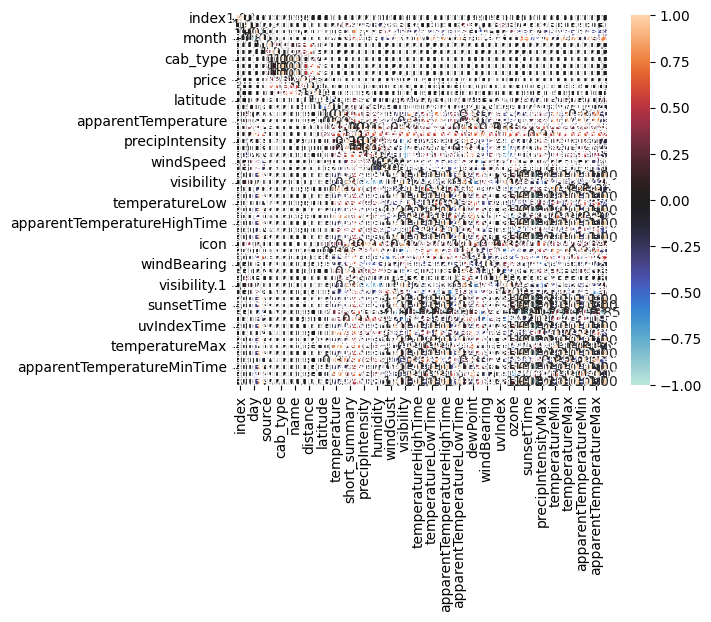

In [11]:
corr = associations(df_without_outliers)

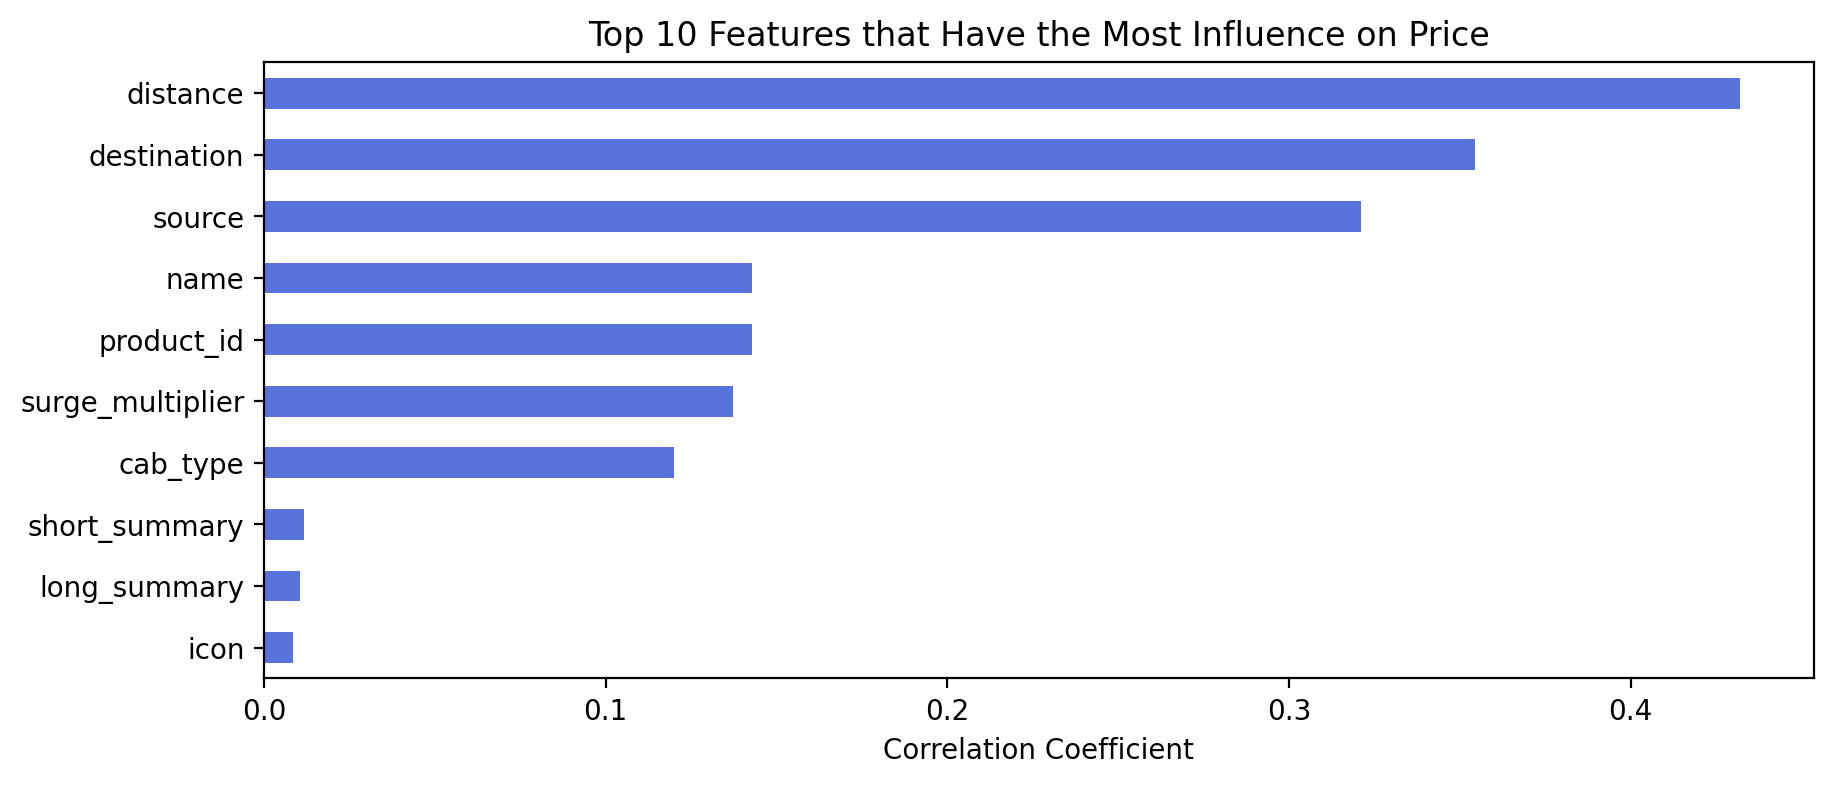

In [12]:
top_10_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(10)

fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Top 10 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

In [13]:
df = df_without_outliers[list(top_10_corr.index) + ["price"]]
df.head()

,distance,destination,source,product_id,name,surge_multiplier,cab_type,short_summary,long_summary,icon,price
35,2.94,Fenway,North Station,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.0,Uber,Mostly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night,29.5
75,3.39,North Station,Boston University,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.0,Uber,Light Rain,Rain throughout the day.,rain,34.0
81,3.39,North Station,Boston University,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.0,Uber,Partly Cloudy,Partly cloudy throughout the day.,partly-cloudy-night,36.0
86,2.82,West End,Fenway,lyft_luxsuv,Lux Black XL,1.0,Lyft,Rain,"Rain until morning, starting again in the eve...",rain,32.5
93,2.49,Back Bay,South Station,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.0,Uber,Light Rain,Light rain in the morning.,rain,32.5


# Data Eksplorasi

In [14]:
cat_columns,num_columns = identify_nominal_columns(df) ,identify_numeric_columns(df)
for i,j in zip (["Categorical Columns", "Numerical Columns"],[cat_columns,num_columns]):
    print(f"{i}\t:{j}")

Categorical Columns	:['destination', 'source', 'product_id', 'name', 'cab_type', 'short_summary', 'long_summary', 'icon']
Numerical Columns	:['distance', 'surge_multiplier', 'price']


In [15]:
# Membuat variabel kategorikal 
cat_columns = df[["destination","source","product_id","name","cab_type", "long_summary","short_summary"]]

In [16]:
# Menampilkan isi dari atribut
for column in cat_columns:
    print(f"\n{column}:\n{df[column].unique()}n")


destination:
['Fenway' 'North Station' 'West End' 'Back Bay' 'Northeastern University'
 'Financial District' 'Theatre District' 'Beacon Hill' 'Boston University'
 'North End' 'South Station' 'Haymarket Square']n

source:
['North Station' 'Boston University' 'Fenway' 'South Station' 'West End'
 'North End' 'Beacon Hill' 'Northeastern University' 'Theatre District'
 'Financial District' 'Back Bay' 'Haymarket Square']n

product_id:
['6d318bcc-22a3-4af6-bddd-b409bfce1546' 'lyft_luxsuv' 'lyft_lux'
 '6c84fd89-3f11-4782-9b50-97c468b19529' 'lyft_plus' 'lyft_premier'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969' 'lyft'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']n

name:
['Black SUV' 'Lux Black XL' 'Lux Black' 'Black' 'Lyft XL' 'Lux' 'UberXL'
 'Lyft' 'UberX' 'WAV' 'UberPool']n

cab_type:
['Uber' 'Lyft']n

long_summary:
[' Mostly cloudy throughout the day. ' ' Rain throughout the day. '
 ' Partly cloudy throughout the day. '


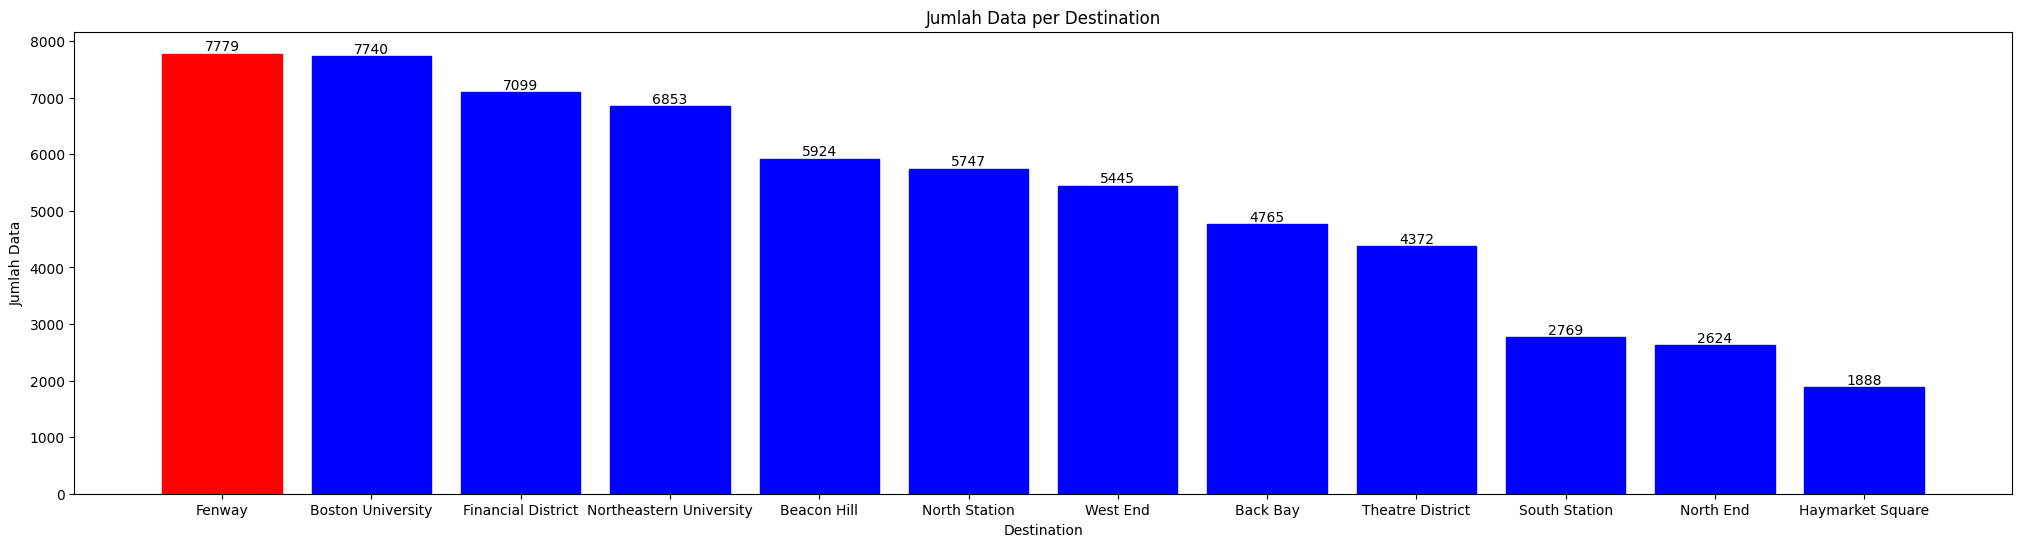

In [17]:
# Hitung jumlah data per destination
df_counts = df['destination'].value_counts().reset_index()
df_counts.columns = ['destination','counts']

#membuat bar chart 
plt.figure(figsize=(25,6))

#mendefinisikan isi bar
bars = plt.bar(df_counts['destination'],df_counts['counts'])

#menandai bar tertinggi
max_count = df_counts['counts'].max()
for bar in bars:
    if bar.get_height() == max_count:
        bar.set_color('red')
    else:
        bar.set_color('blue')

#menambahkan angka pada bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Jumlah Data per Destination', loc='center')
plt.xlabel('Destination')
plt.ylabel('Jumlah Data')
plt.show()

#### Kesimpulan

Dari grafik bar yang dihasilkan, kita dapat menyimpulkan seberapa besar pemesanan Uber dan Lyft. Dengan demikian, analisis ini dapat memberikan wawasan bagi bisnis untuk memahami preferensi pelanggan terkait perusahaan taksi online Uber dan Lyft di wilayah tersebut. Berdasarkan grafik bar di atas, dapat disimpulkan bahwa **Destination (destinasi akhir) paling banyak orang memesan Uber dan Lyft berada di Financial District dan paling sedikit berada di North Station**

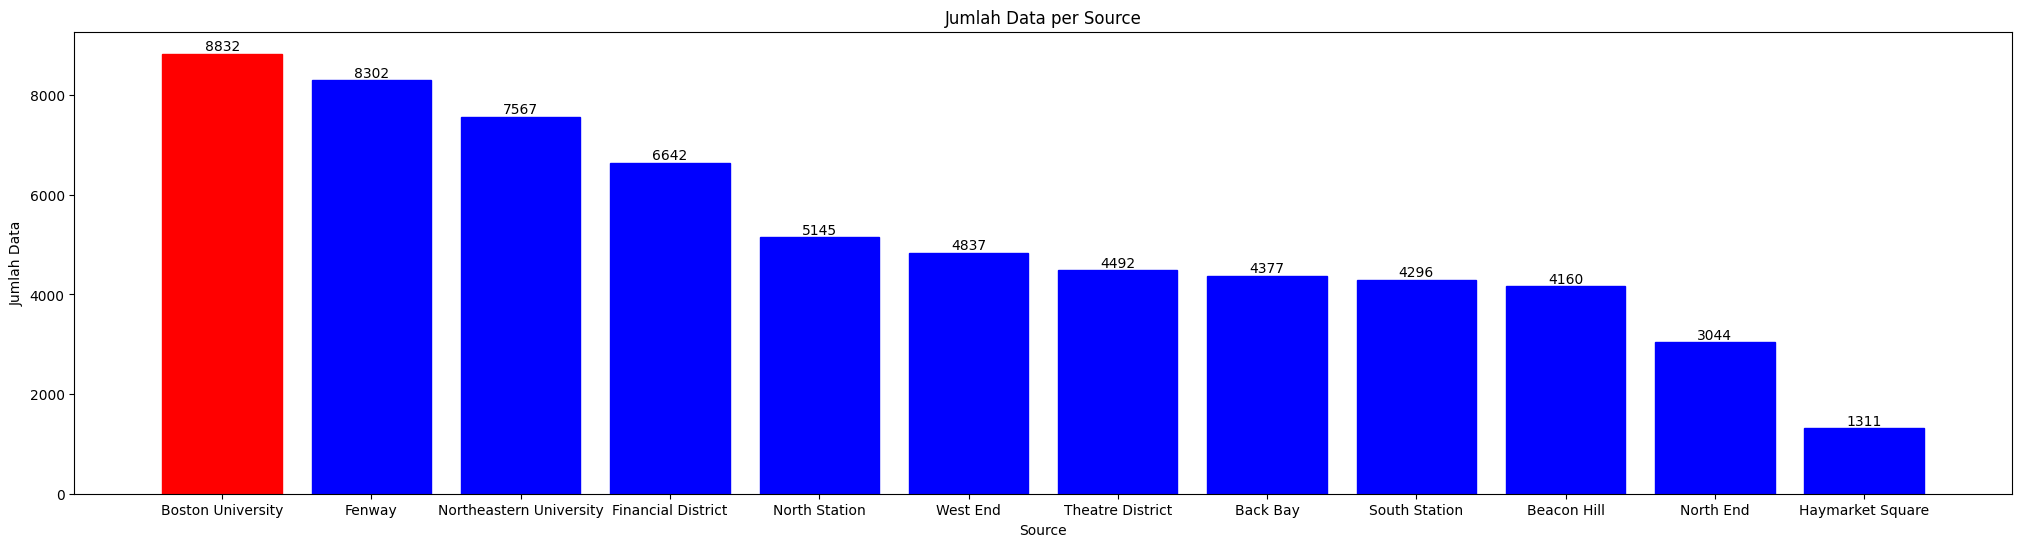

In [18]:
# Hitung jumlah data per source
df_counts = df['source'].value_counts().reset_index()
df_counts.columns = ['source','counts']

#membuat bar chart 
plt.figure(figsize=(25,6))

#mendefinisikan isi bar
bars = plt.bar(df_counts['source'],df_counts['counts'])

#menandai bar tertinggi
max_count = df_counts['counts'].max()
for bar in bars:
    if bar.get_height() == max_count:
        bar.set_color('red')
    else:
        bar.set_color('blue')

#menambahkan angka pada bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Jumlah Data per Source', loc='center')
plt.xlabel('Source')
plt.ylabel('Jumlah Data')
plt.show()

#### Kesimpulan

Dari grafik bar yang dihasilkan, kita dapat menyimpulkan seberapa besar pemesanan Uber dan Lyft. Dengan demikian, analisis ini dapat memberikan wawasan bagi bisnis untuk memahami preferensi pelanggan terkait perusahaan taksi online Uber dan Lyft di wilayah tersebut. Berdasarkan grafik bar di atas, dapat disimpulkan bahwa **Source (destinasi asal) paling banyak orang memesan Uber dan Lyft berada di Financial District dan paling sedikit berada di North Station**

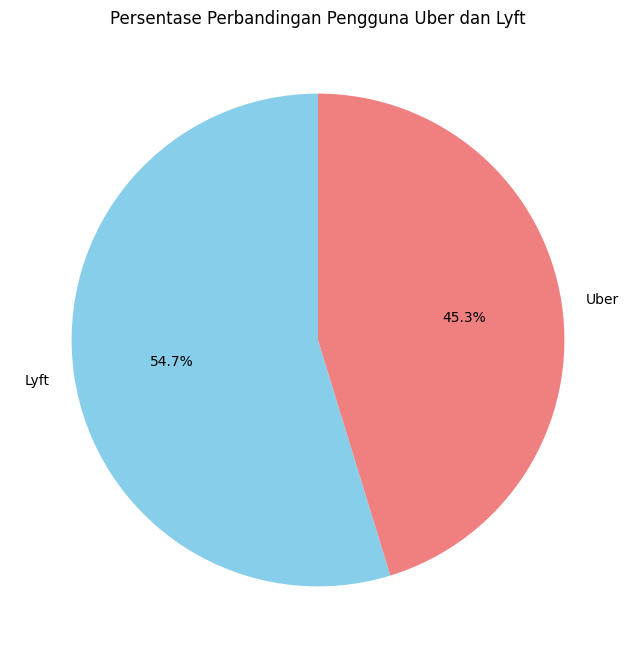

In [19]:
# Menghitung jumlah pengguna Uber dan Lyft
df_counts = df['cab_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Persentase Perbandingan Pengguna Uber dan Lyft')
plt.show()

### Kesimpulan

Dari grafik pie yang dihasilkan, kita dapat menyimpulkan seberapa besar persentase pemesanan yang datang dari masing-masing perusahaan Uber dan Lyft. Dengan demikian, analisis ini dapat memberikan wawasan bagi bisnis untuk memahami preferensi pelanggan terkait perusahaan taksi online Uber dan Lyft di wilayah tersebut. Berdasarkan grafik pie di atas, dapat disimpulkan bahwa **presentase Lyft 5,2% lebih banyak dipesan dibandingkan dengan Lyft**

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_30368\1806555500.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_filtered, x='distance', y='price', hue='cab_type', ci=None)


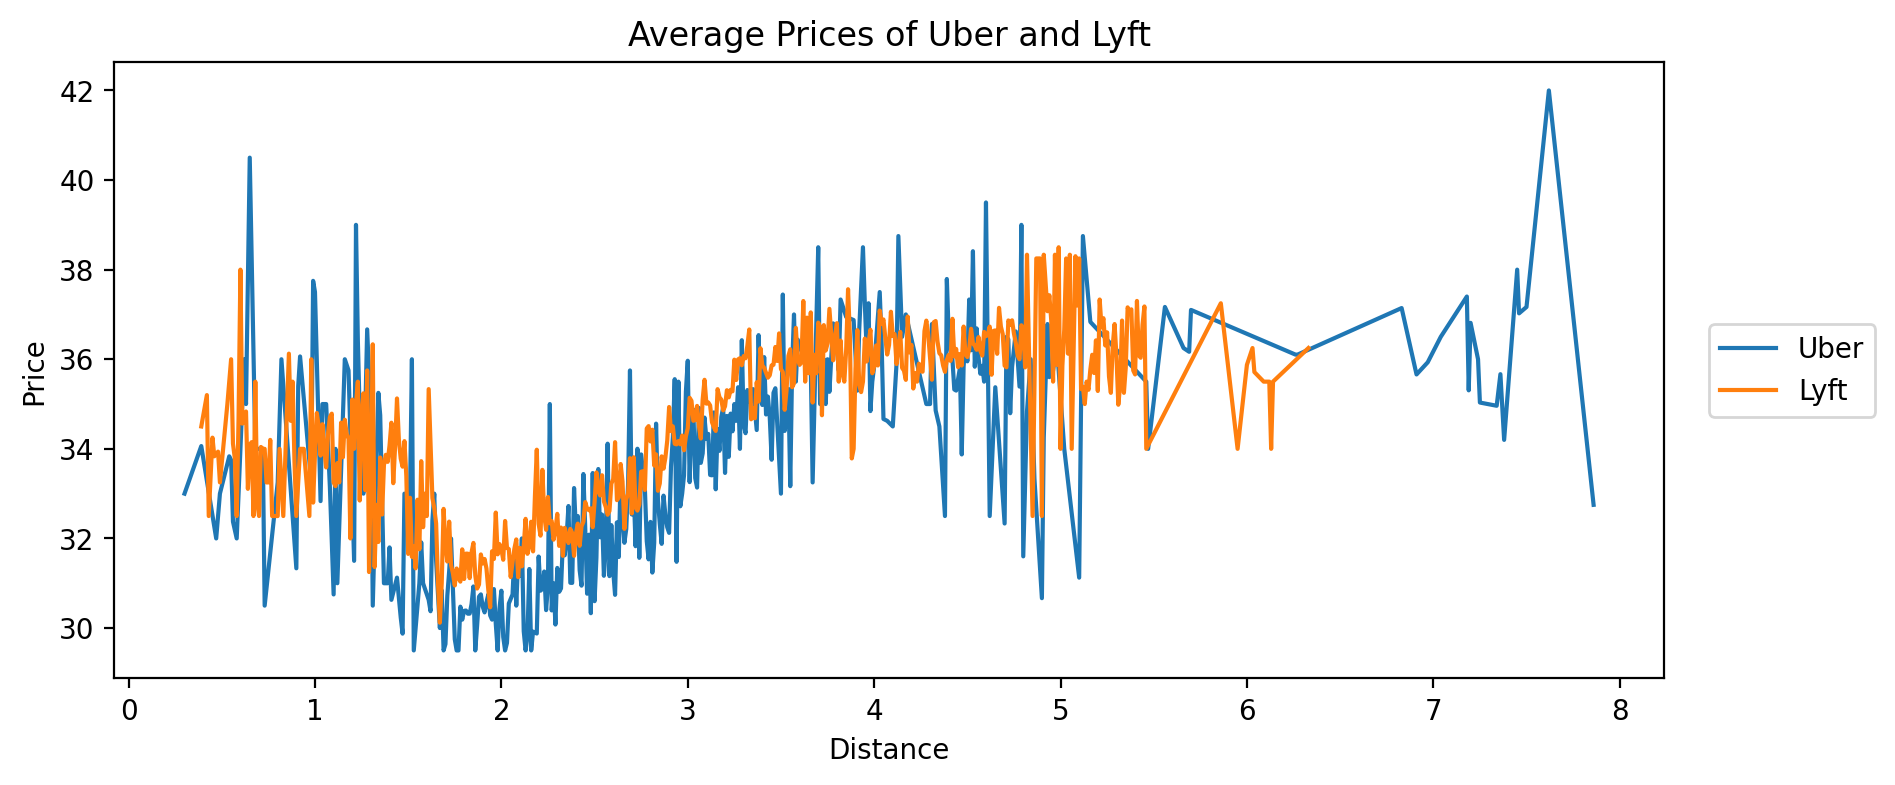

In [20]:
# Memfilter data hanya untuk Uber dan Lyft 
df_filtered = df[df['cab_type'].isin(['Uber','Lyft'])]

# Menampilkan line plot perbandingan harga antara Uber dan Lyft
plt.figure(figsize=(10, 4), dpi=200)
sns.lineplot(data=df_filtered, x='distance', y='price', hue='cab_type', ci=None)
plt.title('Average Prices of Uber and Lyft')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.show()

### Kesimpulan

Berdasarkan line plot diatas, dapat disimpulkan bahwa memang terdapat beberapa perbedaan harga antara Uber dan Lyft berdasarkan jarak. Jika dilihat dari line plot, memang secara keseluruhan harga pada Uber lebih mahal dibandingkan Lyft, hal tersebut mungkin yang menjadi salah satu faktor warna Boston lebih sering menggunakan Lyft

# Data Preprocessing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63005 entries, 35 to 637960
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          63005 non-null  float64
 1   destination       63005 non-null  object 
 2   source            63005 non-null  object 
 3   product_id        63005 non-null  object 
 4   name              63005 non-null  object 
 5   surge_multiplier  63005 non-null  float64
 6   cab_type          63005 non-null  object 
 7   short_summary     63005 non-null  object 
 8   long_summary      63005 non-null  object 
 9   icon              63005 non-null  object 
 10  price             63005 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.8+ MB


In [51]:
from sklearn.model_selection import train_test_split
X = df.drop(["price"], axis=1)
y = df["price"]

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
onehot = TargetEncoder(random_state=0,)
categorical_transformer = Pipeline(steps=[('onehot', onehot)])
#column transformer to pandas 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)],verbose_feature_names_out=False,remainder='passthrough').set_output(transform="pandas")

X_prep = preprocessor.fit_transform(X,y)

In [61]:
X_prep

,destination,source,product_id,name,cab_type,short_summary,long_summary,icon,distance,surge_multiplier
35,34.105866,33.913846,33.382736,33.382736,33.328855,33.815464,33.782858,33.768862,2.94,1.0
75,34.545032,34.532790,33.382736,33.382736,33.328855,33.890321,33.850327,33.828868,3.39,1.0
81,34.513908,34.546145,33.374898,33.374898,33.320429,33.748814,33.722436,33.753953,3.39,1.0
86,33.027694,34.008245,34.358006,34.358006,34.168990,33.797740,33.809462,33.822200,2.82,1.0
93,33.801816,32.501981,33.382442,33.382442,33.334383,33.937968,33.824167,33.842717,2.49,1.0
...,...,...,...,...,...,...,...,...,...,...
637916,33.258059,33.443852,32.913766,32.913766,33.326370,33.834388,33.748293,33.842771,7.36,1.0
637921,31.634750,33.859994,34.331265,34.331265,34.150651,33.773240,33.726252,33.777820,2.44,1.0
637927,33.765449,33.233441,34.358006,34.358006,34.168990,33.775802,33.748293,33.842771,2.88,1.0
637940,31.634750,33.859994,34.331265,34.331265,34.150651,33.779941,33.726252,33.779941,2.44,1.0


In [63]:
linreg = sm.OLS(y, X_prep).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.291e+06
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:27:08   Log-Likelihood:                     -1.4695e+05
No. Observations:               63005   AIC:                                  2.939e+05
Df Residuals:                   62996   BIC:                                  2.940e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
destination          0.6202      0.010     62.638      0.000       0.601       0.640
source               0.5042      0.011     44.697      0.000       0.482       0.526
product_id           3.6854      0.024    156.455      0.000       3.639       3.732
name                 3.6854      0.024    156.455      0.000       3.639       3.732
cab_type            -6.7463      0.055   -122.508      0.000      -6.854      -6.638
short_summary       -0.1103      0.257     -0.430      0.667      -0.613       0.393
long_summary        -0.4573      0.203     -2.247      0.025      -0.856      -0.058
icon                -0.6492      0.295     -2.198      0.028      -1.228      -0.070
distance             1.9180      0.016    118.791      0.000       1.886       1.950
surge_multiplier     9.4612      0.076    124.858      0.000       9.313       9.610
==============================================================================
Omnibus:                     9195.475   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145583.440
Skew:                          -0.066   Prob(JB):                         0.00
Kurtosis:                      10.446   Cond. No.                     4.24e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.21e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
import sklearn
sklearn.__version__

'1.3.2'